# Linear Mixed Effects models

In this tutorial, we will demonstrate the use of the linear mixed effects model to identify main effects. These models are useful when data has some non-independence. For example, if half of the samples of the data come from subject A, and the other half come from subject B, but we want to remove the effect of subject identify and look at only the impact of the features that interest us.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import naplib as nl

### Generate non-independent data

First, we will simulate some non-independent data where subject identity causes a random effect on the output variable, which is also dependent on two independent variables.

In [2]:
# The true effects of each feature will be 1 for feature 1 and -2 for feature 2
betas = np.array([1, -2])

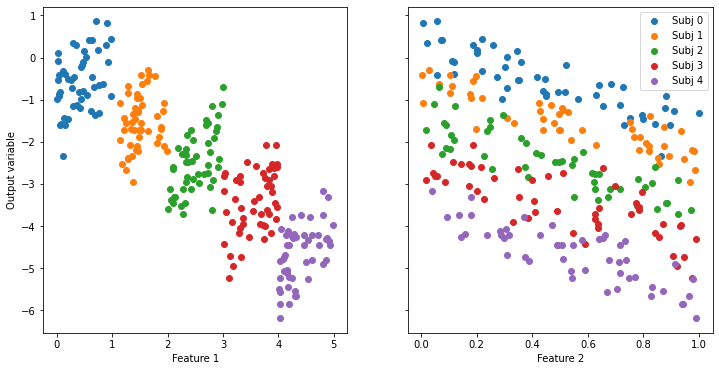

((250, 2), (250,), (250,))

In [3]:
def generate_data(N_per_subject=50, n_subjects=5):
    '''
    Generates independent variables and dependent variables where there is
    a random effect of subject identity.
    There are n_subjects, and each has N_per_subject data points.
    '''
    X = [] # independent variables
    Y = [] # dependent variable
    subject_ID = [] # subject ID random effect variable
    data_mean = np.array([0., 0.]).reshape(1,-1)
    
    subj_betas = np.array([1, 0])
    for i in range(n_subjects):
        X_thissubject = np.random.uniform(size=(N_per_subject,2)) + data_mean
        Y_thissubject = X_thissubject @ betas + data_mean @ subj_betas - 3*data_mean[0,0] + np.random.normal(scale=0.25, size=(N_per_subject,))
        X.append(X_thissubject)
        Y.append(Y_thissubject)
        subject_ID.append(i*np.ones_like(Y_thissubject))
        data_mean += np.array([1, 0]).reshape(1,-1)
        
    fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
    for i, (x, y) in enumerate(zip(X, Y)):
        axes[0].scatter(x[:,0], y, label=f'Subj {i}')
        axes[0].set_xlabel('Feature 1')
        axes[0].set_ylabel('Output variable')
        axes[1].scatter(x[:,1], y, label=f'Subj {i}')
        axes[1].set_xlabel('Feature 2')
    plt.legend()
    plt.show()
    
    return np.concatenate(X), np.concatenate(Y), np.concatenate(subject_ID)
    
X, Y, subject_ID = generate_data()
X.shape, Y.shape, subject_ID.shape

### Use mixed effects model to identify main effects of features 1 and 2 

In [4]:
# Compare results from using the random effect of subject ID and not

# this model uses the random effect of subject ID
model = nl.stats.LinearMixedEffectsModel()
varnames = ['Feature 1', 'Feature 2', 'Subject', 'Output Variable']
model.fit(X, Y, random_effect=subject_ID, varnames=varnames)

model.summary()

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: OutputVariable
No. Observations: 250     Method:             REML          
No. Groups:       5       Scale:              0.0591        
Min. group size:  50      Log-Likelihood:     -25.1379      
Max. group size:  50      Converged:          Yes           
Mean group size:  50.0                                      
-------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept    -4.059     1.424   -2.851  0.004  -6.849  -1.268
Feature1      1.025     0.053   19.166  0.000   0.920   1.130
Feature2     -2.019     0.053  -37.774  0.000  -2.123  -1.914
Subject Var  10.043    29.514                                



In [5]:
# this model does not use the random effect of subject ID
model2 = nl.stats.LinearMixedEffectsModel()
varnames = ['Feature 1', 'Feature 2', 'Output Variable']
model2.fit(X, Y, varnames=varnames)

model2.summary()

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: OutputVariable
No. Observations: 250     Method:             REML          
No. Groups:       1       Scale:              0.3987        
Min. group size:  250     Log-Likelihood:     -244.3102     
Max. group size:  250     Converged:          Yes           
Mean group size:  250.0                                     
-------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     0.684     0.640    1.070  0.285  -0.569   1.938
Feature1     -0.892     0.028  -32.237  0.000  -0.946  -0.837
Feature2     -2.025     0.138  -14.670  0.000  -2.295  -1.754
Group Var     0.399                                          



### Visualize the summaries using main effect plots

As we can see in the Coef. tab of the summaries above, or the main effect plots below, the first model, which used the random effect of subject, recovered the true beta weights for each feature. On the other hand, the second model found the wrong weight for feature 1, since the subject identity had a large effect on the first feature. Its estimate of the main effect of the second feature was close to the truth, but still wrong and with a larger confidence interval.

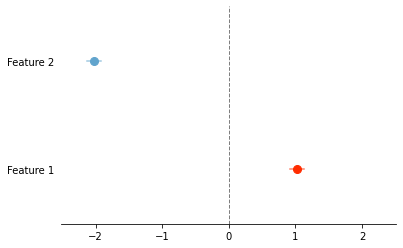

In [6]:
model.plot_effects()
plt.show()

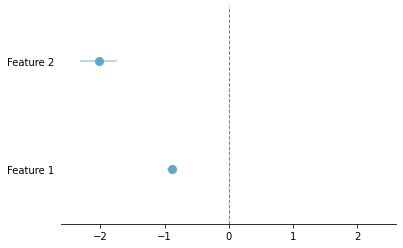

In [7]:
model2.plot_effects()
plt.show()